In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data = np.loadtxt("dataT10.txt")

In [3]:
anguloP = data[:,0]
anguloA = data[:,1]
Yo = data[:,2]
Vo = data[:,3]
a = data[:,4]
print(type(a))


<class 'numpy.ndarray'>


In [4]:
def sumalista(listaNumeros):
   if len(listaNumeros) == 1:
        return float(listaNumeros[0])
   else:
        return float(listaNumeros[0] + sumalista(listaNumeros[1:]))

In [5]:
def f1 (Ao, A1, A2, Angulo):
    return Ao*(np.cos(2*(np.pi*Angulo/180) +A1) ) + A2


In [6]:
ran1 = f1(a, -8, -8, 45 )
AoOpt , basura = curve_fit (f1, a, ran1)

ran2 = f1(sumalista(AoOpt)/len(AoOpt), a, 10, 45 )
A1Opt , basura = curve_fit (f1, a, ran2)

ran3 = f1(sumalista(AoOpt)/len(AoOpt), sumalista(A1Opt)/len(A1Opt), a, 45 )
A2Opt , basura = curve_fit (f1, a, ran3)

f1Fin = f1(sumalista(AoOpt)/len(AoOpt), sumalista(A1Opt)/len(A1Opt), sumalista(A2Opt)/len(A2Opt), anguloP  )
f1Fin= sorted(f1Fin, reverse=True)

/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [7]:
def f2 (Ao, A1, A2, Angulo):
    return Ao+(A1*Angulo) +(A2*(Angulo*Angulo))

In [8]:
ran1 = f2(a, -8, -8, 45 )
AoOpt , basura = curve_fit (f2, a, ran1)

ran2 = f2(sumalista(AoOpt)/len(AoOpt), a, 10, 45 )
A1Opt , basura = curve_fit (f2, a, ran2)

ran3 = f2(sumalista(AoOpt)/len(AoOpt), sumalista(A1Opt)/len(A1Opt), a, 45 )
A2Opt , basura = curve_fit (f2, a, ran3)

f2Fin = f1(sumalista(AoOpt)/len(AoOpt), sumalista(A1Opt)/len(A1Opt), sumalista(A2Opt)/len(A2Opt), anguloP )
f2Fin= sorted(f2Fin, reverse=True)


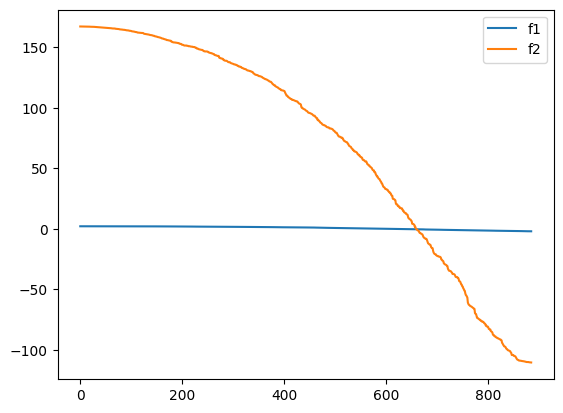

In [9]:
x = np.linspace(0,len(f1Fin),len(f1Fin))
plt.plot(x, f1Fin, label="f1")
x2 = np.linspace(0,len(f2Fin),len(f2Fin))
plt.plot(x2, f2Fin, label="f2")
plt.legend()

Error


In [10]:
def sumE (lista, lista2):
    if len(lista) == 1 or len(lista2) == 1:
        return float((lista[0]-lista2[0])**2)
    else:
        return float( (lista[0]-lista2[0])**2 + sumE(lista[1:], lista2[1:]))


In [12]:
a = sorted(a, reverse=True)

#error F1
e1=sumE(f1Fin, a)
#error F2
e2 =sumE(f2Fin, a)

if e1>e2:
    print("F2 es mas precisa")
else:
    print("F1 es mas precisa")



F1 es mas precisa
